In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.datasets import make_blobs

In [2]:
import pandas as pd

data = pd.read_csv("C:\ZZZZ-MINE\Manipal\Semester 5\DMPA\OC_Marker.csv")
data

,Age,Menopause,CA19-9,CA72-4,AFP,CA125,HE4,CEA,TYPE,TYPE.1
0,47,0,36.48,6.42,3.58,15.36,183.94,1.40,0,BOT
1,61,1,19.98,10.17,34.24,2444.00,934.10,2.46,0,BOT
2,39,0,12.18,10.17,1.50,56.08,47.56,0.77,0,BOT
3,45,1,18.41,131.60,2.75,2555.00,853.50,0.82,0,BOT
4,45,0,11.15,10.17,2.36,1391.00,404.90,0.42,0,BOT
...,...,...,...,...,...,...,...,...,...,...
344,52,0,15.11,10.17,2.09,50.80,31.45,1.74,1,OC
345,37,0,0.62,10.17,2.00,21.93,44.44,1.67,1,OC
346,59,1,2.18,10.17,2.83,51.33,42.65,2.31,1,OC
347,30,0,10.71,10.17,1.84,53.87,30.78,0.93,1,OC


In [5]:
columns_t_drop = ['TYPE','TYPE.1']
x = data.drop(columns=columns_t_drop,axis = 1)
x.head()

,Age,Menopause,CA19-9,CA72-4,AFP,CA125,HE4,CEA
0,47,0,36.48,6.42,3.58,15.36,183.94,1.40
1,61,1,19.98,10.17,34.24,2444.00,934.10,2.46
2,39,0,12.18,10.17,1.50,56.08,47.56,0.77
3,45,1,18.41,131.60,2.75,2555.00,853.50,0.82
4,45,0,11.15,10.17,2.36,1391.00,404.90,0.42


In [6]:
y = data['TYPE']
y

0      0
1      0
2      0
3      0
4      0
      ..
344    1
345    1
346    1
347    1
348    1
Name: TYPE, Length: 349, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
x = scaler.fit_transform(x)

In [10]:
x

array([[0.47058824, 0.        , 0.03590154, ..., 0.00232374, 0.04749651,
        0.00865801],
       [0.67647059, 1.        , 0.01939163, ..., 0.48841631, 0.26055628,
        0.01630592],
       [0.35294118, 0.        , 0.01158695, ..., 0.01047386, 0.00876199,
        0.00411255],
       ...,
       [0.64705882, 1.        , 0.00158095, ..., 0.00952314, 0.00736746,
        0.01522367],
       [0.22058824, 0.        , 0.01011607, ..., 0.01003152, 0.00399615,
        0.00526696],
       [0.35294118, 0.        , 0.02820692, ..., 0.00854641, 0.00474596,
        0.0040404 ]])

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
344    1
345    1
346    1
347    1
348    1
Name: TYPE, Length: 349, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=1)

In [17]:
ypred = knn.predict(xtest)

In [18]:
ypred

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1], dtype=int64)

In [19]:
ytest

192    1
256    1
169    0
67     0
201    1
      ..
59     0
12     0
291    1
107    0
348    1
Name: TYPE, Length: 70, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix, classification_report

In [32]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[23  9]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.78      0.84      0.81        38

    accuracy                           0.79        70
   macro avg       0.79      0.78      0.78        70
weighted avg       0.79      0.79      0.78        70



In [33]:
import numpy as np

In [34]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred_i = knn.predict(xtest)

    error_rate.append(np.mean(pred_i != ytest))


Text(0, 0.5, 'Error rate')

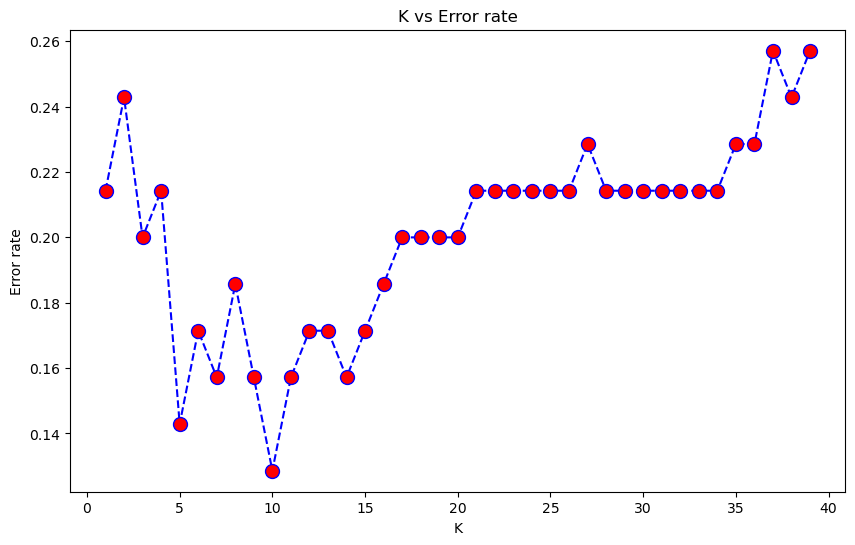

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue',linestyle='--',markersize=10, markerfacecolor='red',marker='o')

plt.title('K vs Error rate')

plt.xlabel('K')

plt.ylabel('Error rate')

In [36]:
#lowest at 10

In [37]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(xtrain,ytrain)
predictions = knn.predict(xtest)

print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[23  9]
 [ 6 32]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        32
           1       0.78      0.84      0.81        38

    accuracy                           0.79        70
   macro avg       0.79      0.78      0.78        70
weighted avg       0.79      0.79      0.78        70

